In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [ ]:
df = pd.read_excel("/content/compiled_risk_data.xlsx")

# Display the first five rows of the dataframe
df.head()


,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,0.0,0.0,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,0.0,1.0,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,0.0,1.0,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,0.0,1.0,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,0.0,0.0,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   project_name                                967 non-null    object 
 1   Smart contract address                      967 non-null    object 
 2   Blog post link                              967 non-null    object 
 3   Audit website                               967 non-null    object 
 4   Chain                                       967 non-null    object 
 5   Is_closed_source                            967 non-null    bool   
 6   hidden_owner                                967 non-null    bool   
 7   anti_whale_modifiable                       967 non-null    bool   
 8   Is_anti_whale                               967 non-null    bool   
 9   Is_honeypot                                 967 non-null    bool   
 10  buy_tax       

In [ ]:
def phi_coefficient(x, y):
    """Calculate the Phi coefficient for two binary variables."""
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    # Calculate the phi coefficient from the contingency table
    chi2 = scipy.stats.chi2_contingency(contingency_table, correction=False)[0]
    n = np.sum(np.sum(contingency_table))
    phi = np.sqrt(chi2 / n)
    return phi

# Example calculation between two risk tags
phi = phi_coefficient(df['sell_tax'], df['buy_tax'])
print(f"Phi Coefficient between 'Is_honeypot' and 'anti_whale_modifiable': {phi}")

Phi Coefficient between 'Is_honeypot' and 'anti_whale_modifiable': 0.7104630100944922


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
risk_columns = ['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths']

In [ ]:
risk_df = df[risk_columns]

# Create a DataFrame to store Phi coefficients
phi_matrix = pd.DataFrame(index=risk_df.columns, columns=risk_df.columns)

# Calculate Phi coefficient for each pair of binary variables
for var1 in risk_df.columns:
    for var2 in risk_df.columns:
        phi_matrix.loc[var1, var2] = phi_coefficient(risk_df[var1], risk_df[var2])

print("Phi coefficients calculated for all pairs of variables:")
phi_matrix

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi coefficients calculated for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,sell_tax,slippage_modifiable,Is_blacklisted,can_take_back_ownership,...,centralized_risk_medium,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths
Is_closed_source,1.0,0.369825,0.343793,0.315152,0.395294,0.321812,0.387156,0.395293,0.338371,0.271559,...,0.155005,0.217354,0.222421,0.360043,0.132648,0.275936,0.249433,0.342951,0.369848,0.30473
hidden_owner,0.369825,1.0,0.371578,0.356021,0.328014,0.454177,0.422091,0.418828,0.299462,0.372939,...,0.204905,0.332364,0.207183,0.302669,0.129919,0.228094,0.262604,0.335381,0.299793,0.190843
anti_whale_modifiable,0.343793,0.371578,1.0,0.536006,0.443704,0.460264,0.523498,0.625441,0.33861,0.339978,...,0.231735,0.346207,0.180772,0.374556,0.185268,0.300558,0.309001,0.36614,0.411167,0.303052
Is_anti_whale,0.315152,0.356021,0.536006,1.0,0.371245,0.501367,0.513153,0.507013,0.342278,0.281739,...,0.219838,0.294004,0.199763,0.336262,0.170635,0.383476,0.274457,0.34901,0.385632,0.296332
Is_honeypot,0.395294,0.328014,0.443704,0.371245,1.0,0.386469,0.414324,0.389585,0.478634,0.287442,...,0.19187,0.224287,0.275755,0.367158,0.212279,0.387316,0.31973,0.45656,0.440523,0.358995
buy_tax,0.321812,0.454177,0.460264,0.501367,0.386469,1.0,0.710463,0.444537,0.339422,0.326003,...,0.239542,0.291784,0.220048,0.288925,0.157569,0.359325,0.255471,0.354019,0.38716,0.290881
sell_tax,0.387156,0.422091,0.523498,0.513153,0.414324,0.710463,1.0,0.465644,0.381907,0.272188,...,0.291278,0.310494,0.23208,0.328965,0.179746,0.354068,0.337649,0.328301,0.42844,0.295159
slippage_modifiable,0.395293,0.418828,0.625441,0.507013,0.389585,0.444537,0.465644,1.0,0.285621,0.362606,...,0.237516,0.329007,0.244272,0.384301,0.206749,0.315036,0.346361,0.346984,0.415881,0.327842
Is_blacklisted,0.338371,0.299462,0.33861,0.342278,0.478634,0.339422,0.381907,0.285621,1.0,0.244082,...,0.157359,0.333584,0.177963,0.36036,0.185408,0.29712,0.26178,0.378526,0.432002,0.296575
can_take_back_ownership,0.271559,0.372939,0.339978,0.281739,0.287442,0.326003,0.272188,0.362606,0.244082,1.0,...,0.243507,0.36217,0.216989,0.292306,0.136021,0.303422,0.223104,0.354918,0.311808,0.241693


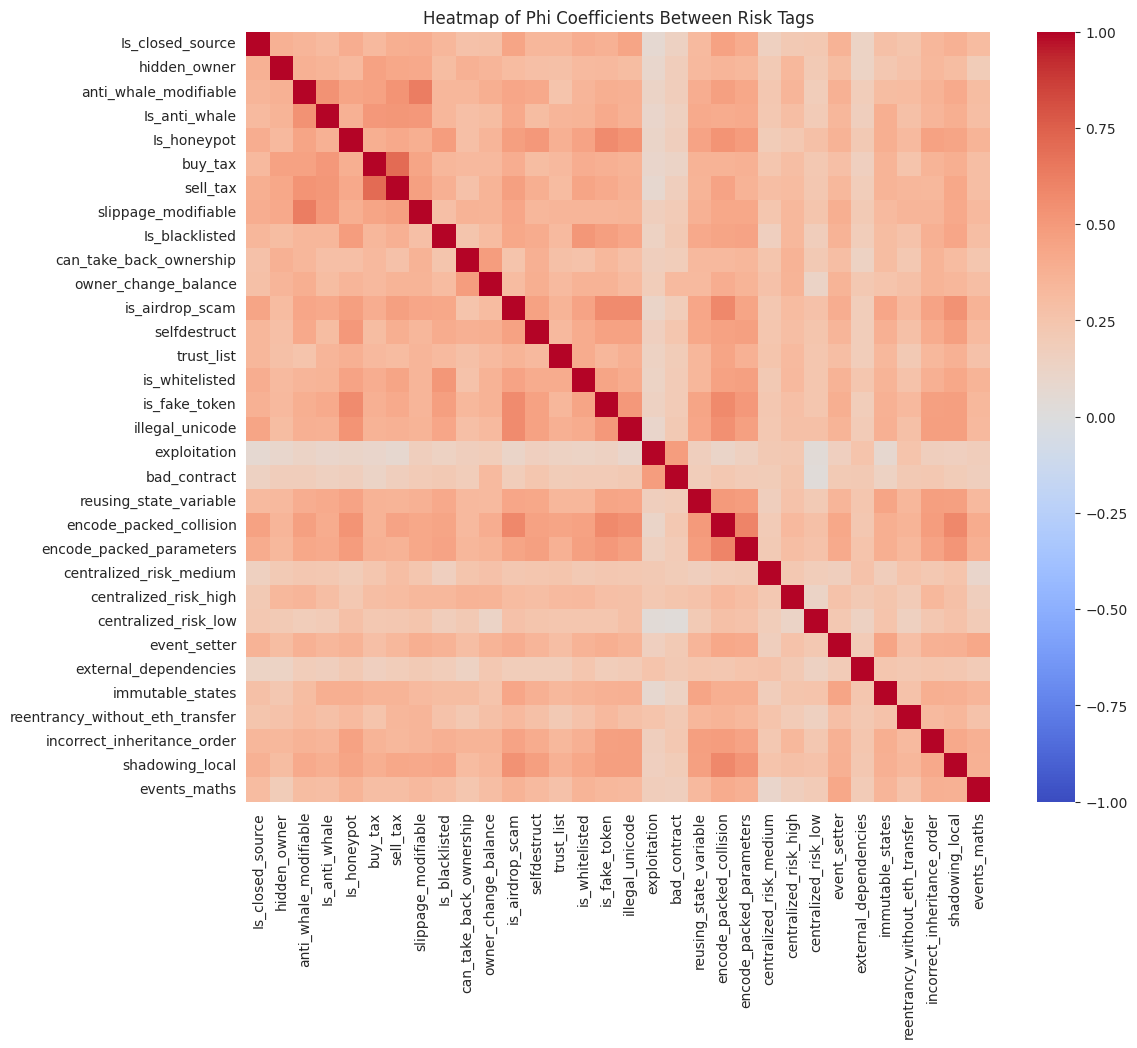

In [ ]:
# Setting the size of the plot
plt.figure(figsize=(12, 10))

# Creating a heatmap
sns.heatmap(phi_matrix.astype(float), annot=False, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Phi Coefficients Between Risk Tags')
plt.show()


In [ ]:
# Calculating the frequency of 'True' in each risk tag column
frequencies = df[risk_columns].apply(lambda x: x.value_counts()).loc[True]
frequencies = frequencies.fillna(0)  # Replace NaN with 0 for any column that may not have True values
frequencies

,True
Is_closed_source,146
hidden_owner,150
anti_whale_modifiable,112
Is_anti_whale,138
Is_honeypot,89
buy_tax,117
sell_tax,119
slippage_modifiable,139
Is_blacklisted,76
can_take_back_ownership,181


<ipython-input-19-485c05469a2d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


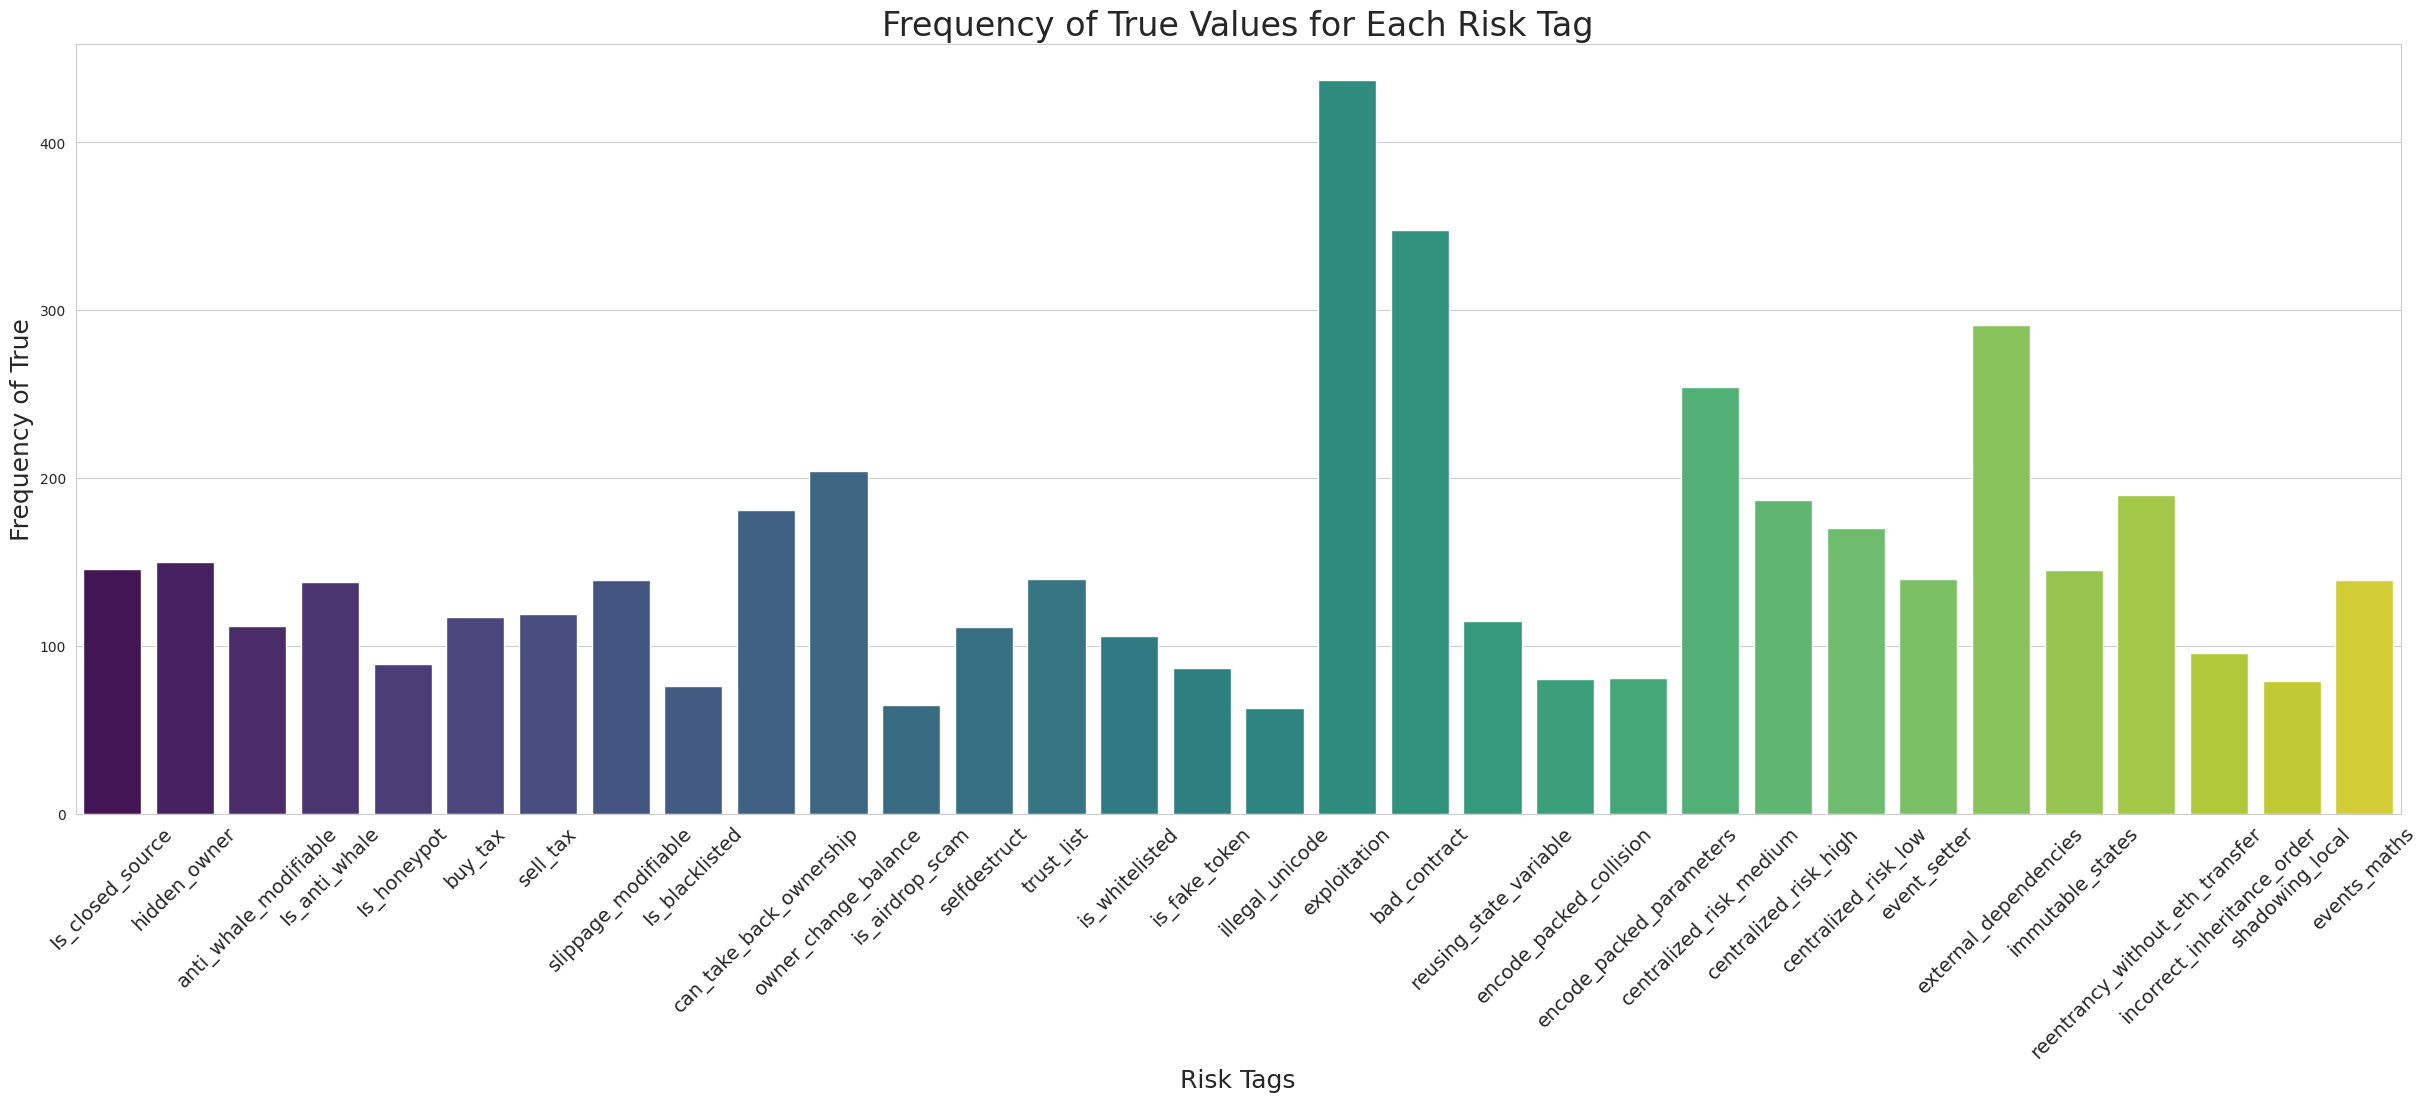

In [ ]:
# Visualizing the frequencies using a bar chart
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set_style("whitegrid")

# Create a bar plot to represent the frequencies visually
plt.figure(figsize=(30, 10))
sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')

# Set the title and labels for the plot
plt.title('Frequency of True Values for Each Risk Tag', fontsize=24)
plt.xlabel('Risk Tags', fontsize=18)
plt.ylabel('Frequency of True', fontsize=18)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=14)

# Display the plot
plt.show()
